In [1]:
import sys
import matplotlib
sys.path.append('../../../../')
from plot_tools.fig_preamble import * # imports numpy, matplotlib, Py2PDF, plot_helper_funcs, plot_figstyle_sheet

% matplotlib inline

/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:
/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markeredgecolor != ec:


#### Paths ####

In [2]:
ver=0
datapath = '../../../DATA_v'+str(ver)+'_/' #v'+str(ver)+'/DATA_v'+str(ver)+'/'
savefig = '../svg/poster_2017_07_08_'
figname = 'two_v2'

#### Figure: LSF and AKF for f0B/J (Reducing Prediction Horizon) ####

In [3]:
## Data
test_case_list = [24, 24, 24, 24]
variation_list = [1, 2, 4, 7]
case_labels = ['(e)', '(f)', '(g)', '(h)']
case_ratios = [0.2, 0.4, 0.8, 2.0]

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 24 1
Total coeff 836.06573222 1.36454556064
LKFFB
I am in RISK DICT and test case and variations are: 24 1


../../../../data_tools/data_tuned_run_analysis.py:275: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (freq_basis_array == None) and (instantA == None):


LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 24 2
Total coeff 30508.8462372 24.8967928531
LKFFB
I am in RISK DICT and test case and variations are: 24 2
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 24 4
Total coeff 23.4098238481 0.00955181212923
LKFFB
I am in RISK DICT and test case and variations are: 24 4
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 24 7
Total coeff 162.495024666 0.0265208650456
LKFFB
I am in RISK DICT and test case and variations are: 24 7


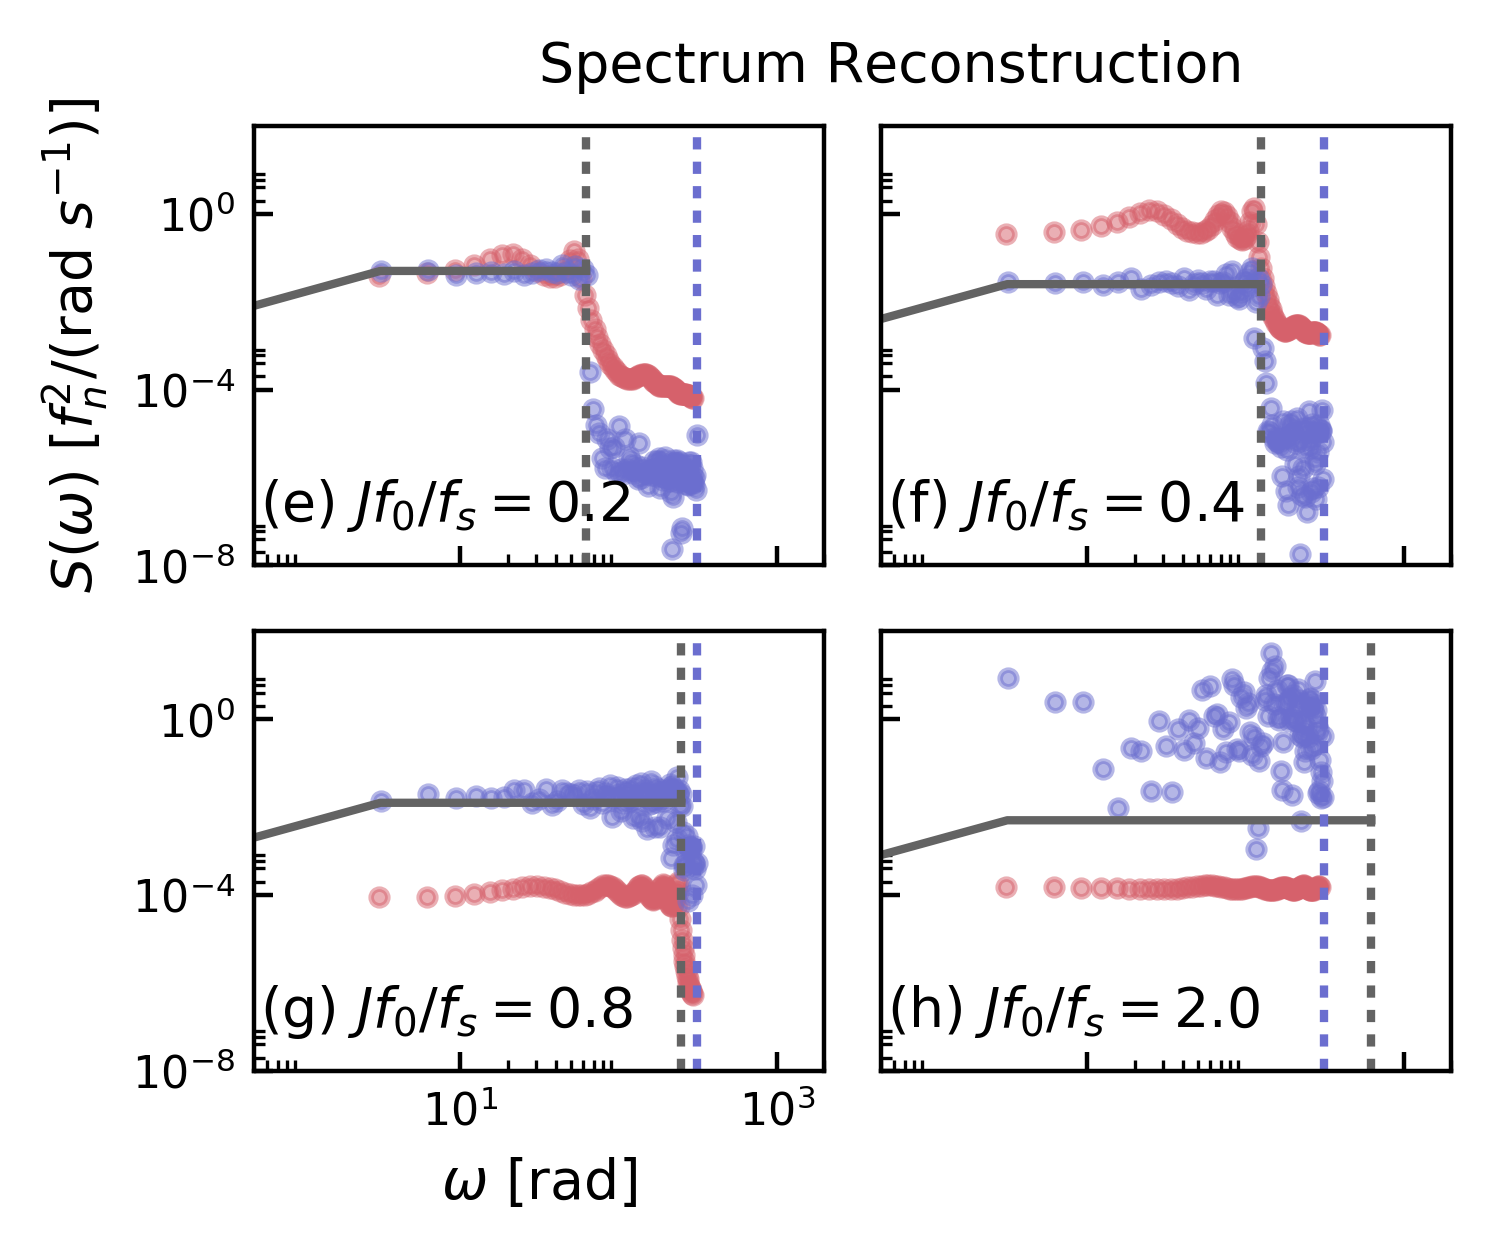

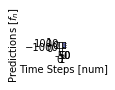

In [4]:
## Fig Setup
nrows = 2
ncols = 2

gs = gridspec.GridSpec(nrows, ncols,
                       left=0.2, right=0.96, 
                       top=0.9, bottom=0.15, 
                       wspace=0.1, hspace=0.15)

fig = plt.figure(figsize=(cm2inch(10.), cm2inch(8.)), dpi=my_dpi)
dumpfig = plt.figure(figsize=(0.1, 0.1))
dumpax = dumpfig.add_subplot(121)
dumpax2 = dumpfig.add_subplot(122)

vars()['ax_0']  = fig.add_subplot(gs[ 0,0])
vars()['ax_1']  = fig.add_subplot(gs[ 0,1]) 
vars()['ax_2']  = fig.add_subplot(gs[ 1,0])
vars()['ax_3']  = fig.add_subplot(gs[ 1,1]) 

algolist = ['LSF', 'AKF', 'LKFFB']
for idx_c in xrange(len(test_case_list)):
   
    # Single Predictions    
    dumpax2, vars()['ax_'+str(idx_c)] = psp(dumpax2, vars()['ax_'+str(idx_c)],  ['LSF', 'AKF', 'LKFFB'], 
                                           test_case_list[idx_c], variation_list[idx_c], 
                                           datapath, GPRP_load='No', ylim_amps = [-8, 2],
                                           fstep=50, sstep=50, lowloss=20)
    
    vars()['ax_'+str(idx_c)].text(0.01, 0.1, case_labels[idx_c] + r' $ J f_0 /f_s = $%s'%(case_ratios[idx_c]), 
                                  fontsize=Fsize, transform=vars()['ax_'+str(idx_c)].transAxes)
    # Formatting
    vars()['ax_'+str(idx_c)].legend_.remove()
    vars()['ax_'+str(idx_c)].set_xlim([0.5, 2*10**3])
    vars()['ax_'+str(idx_c)].set_xscale('log')      

    vars()['ax_'+str(idx_c)] = set_font_sizes(vars()['ax_'+str(idx_c)], fsize, Fsize)

vars()['ax_'+str(0)].text(0.5, 1.1, 'Spectrum Reconstruction', 
                                  fontsize=Fsize, transform=vars()['ax_'+str(0)].transAxes)

vars()['ax_'+str(0)].set(xticklabels=[], xlabel='')
vars()['ax_'+str(1)].set(xticklabels=[],  xlabel='', ylabel='', yticklabels=[])
vars()['ax_'+str(3)].set(xticklabels=[],   xlabel='', ylabel='', yticklabels=[])
vars()['ax_'+str(2)].set(ylabel='')
fig.savefig(savefig+figname+'.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()



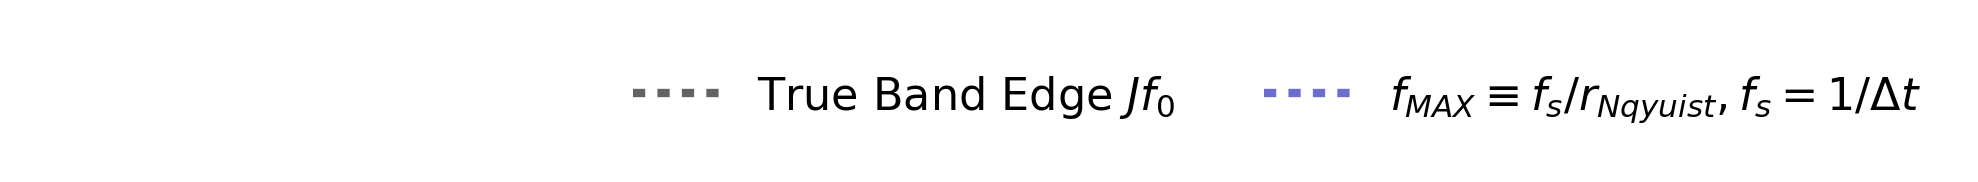

In [5]:
fig1 = plt.figure(figsize=(cm2inch(15),cm2inch(0.8)), dpi=my_dpi)

ax = fig1.add_subplot(111)
lgd=ax.legend(handles=SPEC_EST_H,
       labels=SPEC_EST_L,
       bbox_to_anchor=(0.3, 0, 0.0,1.1), loc=2, ncol=4, frameon=True, fontsize=fsize, 
       facecolor='white', edgecolor='white')
ax.set_frame_on(False)
ax.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')

fig1.savefig(savefig+figname+'lgnd.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()

In [6]:
# Make KalmanX N.Log(BR) Difference Matrix Error Chart

for kalmanX in ['LKFFB', 'AKF']:
    dummy = []
    for idx_count in xrange(len(test_case_list)):
        dummy.append(get_Kalman_LSF_difference(kalmanX, test_case_list[idx_count], 
                                               variation_list[idx_count], datapath))
    vars()[kalmanX+'_diff_matrx'] =  np.array(dummy)
    

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 1
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 2
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 4
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 7
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 1
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 2
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 4
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 7


LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 1
(24, 1)
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 1
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 2
(24, 2)
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 2
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 4
(24, 4)
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 4
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 7
(24, 7)
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 7


/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


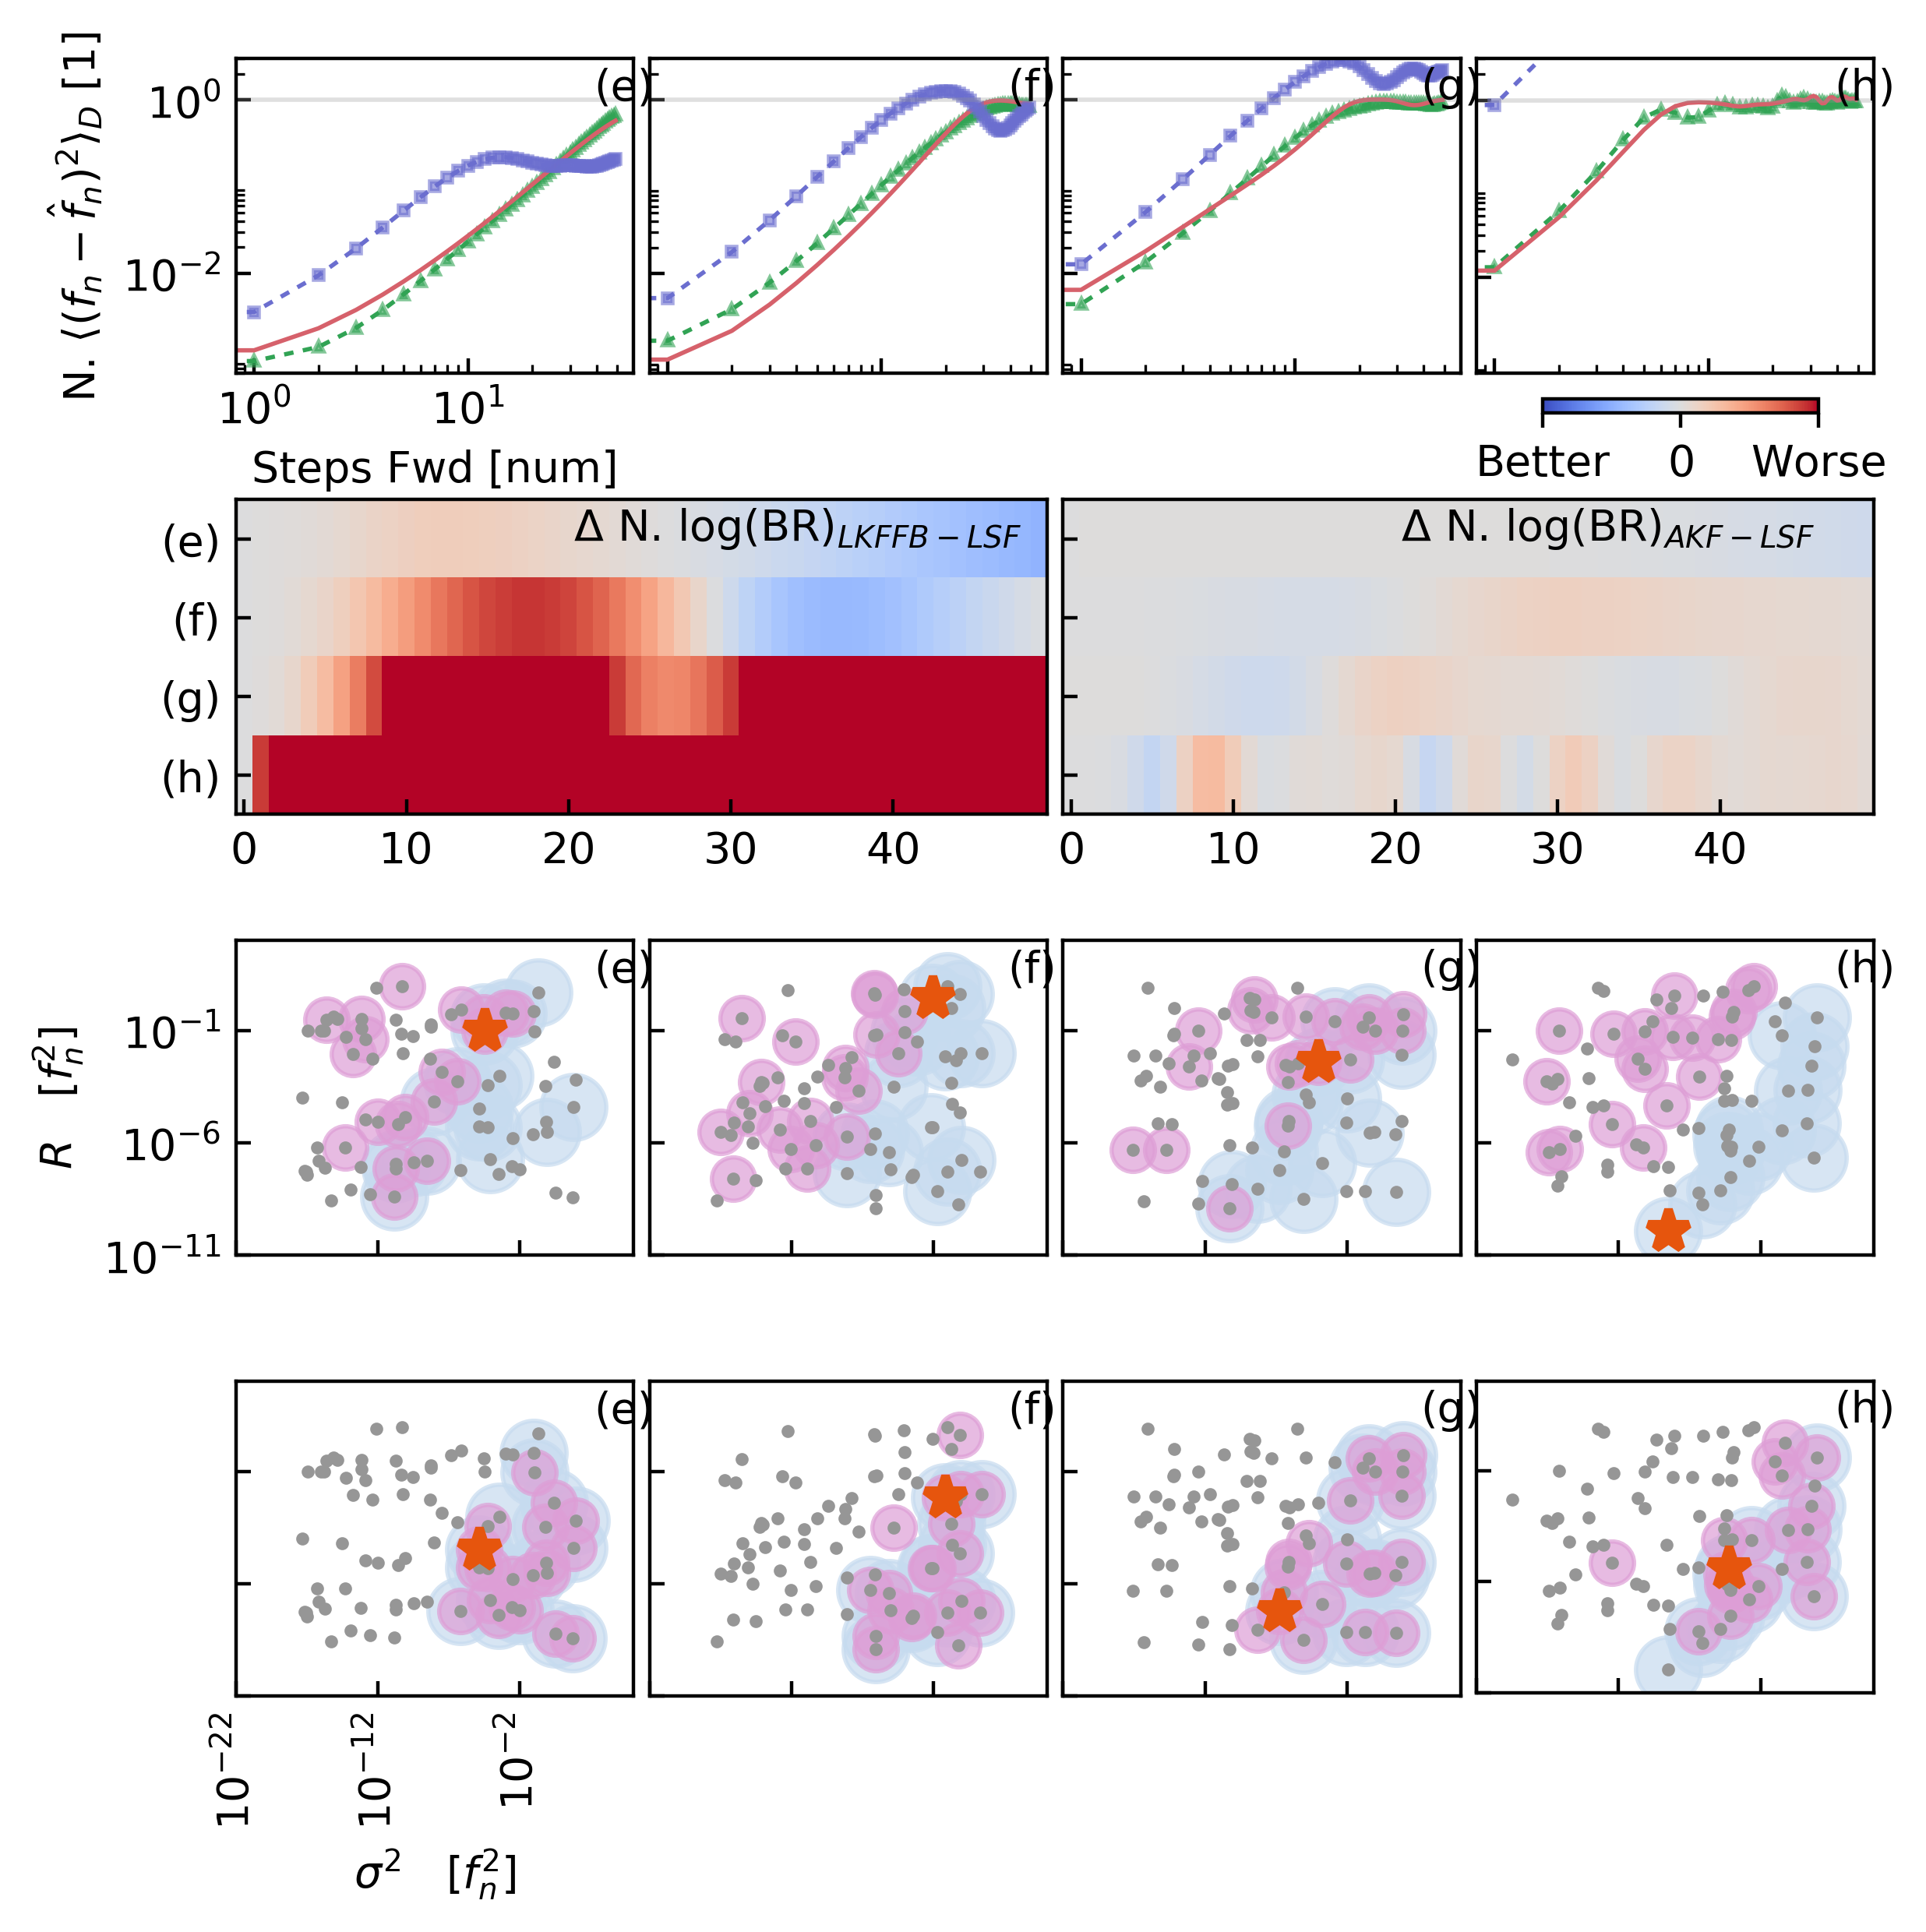

In [7]:
## Fig Setup
nrows = 4
ncols = 4


gs = gridspec.GridSpec(nrows, ncols,
                       left=0.1, right=0.99, 
                       top=0.99, bottom=0.1, 
                       wspace=0.04, hspace=0.4)

fig = plt.figure(figsize=(cm2inch(15.), cm2inch(15.)), dpi=my_dpi)
dumpfig = plt.figure(figsize=(0.1, 0.1))
dumpax = dumpfig.add_subplot(111)


LKFFB_ax = fig.add_subplot(gs[1, 0:2])
AKF_ax = fig.add_subplot(gs[1, 2:])

for kalmanX in ['LKFFB', 'AKF']:
    orig_cmap = matplotlib.cm.coolwarm
    vars()[kalmanX+'_im'] = vars()[kalmanX+'_ax'].imshow(vars()[kalmanX+'_diff_matrx'], vmax=1, vmin=-1,
                                                         cmap=orig_cmap, aspect='auto')
            
    vars()[kalmanX+'_ax'].set_yticks([0, 1, 2, 3])
    vars()[kalmanX+'_ax'].tick_params(direction='in', axis='both')
    vars()[kalmanX+'_ax'].margins(0.2)
    vars()[kalmanX+'_ax'].set_xlim([-0.5, 49.5])
    

LKFFB_ax.set_yticklabels(case_labels)
AKF_ax.set(ylabel='', yticklabels=[])
LKFFB_ax.text(0.4, 0.87, r' $\Delta$ N. log(BR)$_{LKFFB - LSF}$', transform=LKFFB_ax.transAxes)
AKF_ax.text(0.4, 0.87, r' $\Delta$ N. log(BR)$_{AKF - LSF}$', transform=AKF_ax.transAxes)


# Plot loss maps

for idx_c in xrange(len(test_case_list)):
    
    vars()['ax'+str(idx_c)+'_mean']  = fig.add_subplot(gs[0, idx_c])
    vars()['ax'+str(idx_c)+'_1']  = fig.add_subplot(gs[2, idx_c])
    vars()['ax'+str(idx_c)+'_2']  = fig.add_subplot(gs[3, idx_c])
    
    dumpax, vars()['ax'+str(idx_c)+'_mean'] = pnm(dumpax, vars()['ax'+str(idx_c)+'_mean'],  ['LSF', 'AKF', 'LKFFB'], 
                                           test_case_list[idx_c], variation_list[idx_c], 
                                           datapath, GPRP_load='No',
                                           fstep=50, sstep=50, lowloss=20, 
                                           ylim = [-4.5, 3.75], yscale='log')
    
    vars()['ax'+str(idx_c)+'_1'], vars()['ax'+str(idx_c)+'_2'] = plot_risk_map_2(vars()['ax'+str(idx_c)+'_1'], ['LKFFB', 'AKF'], 
                          test_case_list[idx_c], variation_list[idx_c], datapath,
                          figax2=vars()['ax'+str(idx_c)+'_2'], xlim=[-22, 6], ylim = [-11, 3])
    
    for ax_ in [vars()['ax'+str(idx_c)+'_mean'], vars()['ax'+str(idx_c)+'_1'] , vars()['ax'+str(idx_c)+'_2']]:
        ax_.text(0.9, 0.87, case_labels[idx_c], transform=ax_.transAxes)
        if idx_c !=0:
            ax_.set(title='', xlabel='', ylabel='', xticklabels=[], yticklabels=[])
            

    vars()['ax'+str(idx_c)+'_mean'].set_ylim([-0.1, 3])

vars()['ax'+str(0)+'_1'].set(title='', xlabel='', xticklabels=[])
vars()['ax'+str(0)+'_2'].set(title='', ylabel='', yticklabels=[])
plt.setp(vars()['ax'+str(0)+'_2'].get_xticklabels(), rotation=90, horizontalalignment='center')

# Make colorbar
cb = fig.colorbar(vars()[kalmanX+'_im'], orientation='horizontal', fraction=0.01, pad=0.0,
                  ticks=[-1, 0, 1])
cb.ax.set_xticklabels([r'Better', r'$0$', r'Worse'])
cb.ax.set_position([0.81, 0.705, 0.15, 0.1])

fig.show()
plt.close()